## Investigate a Dataset - European Soccer Database

## Data Set
European Soccer Database

## Overview and Notes
This soccer database comes from Kaggle and is well suited for data analysis and machine learning.  
It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.  
This dataset is quite extensive, and we encourage you to read more about it here.  
The database is stored in a SQLite database. You can access database files using software like DB Browser.  
This dataset will help you get good practice with your SQL joins.  
Make sure to look at how the different tables relate to each other.  
Some column titles should be self-explanatory, and others you’ll have to look up on Kaggle.  

## Sources
https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True  
https://www.kaggle.com/hugomathien/soccer

## Example Questions
What teams improved the most over the time period?  
Which players had the most penalties?  
What team attributes lead to the most victories?  



## Import data analysis modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

## Connect to the local sqlite database with the following tables:  
## Country, League, Match, Player, Player_Attributes, Team, Team_Attributes

In [2]:
connection = sqlite3.connect('database.sqlite')

## Run any query, store and display results in a DataFrame
## Select Country, League, Date, Team Home, Team Away and the final score for every match in the dataset that belongs to the Spanish LIGA BBVA league.

In [3]:
query = '''
select 
    Country.name as Country, 
    League.name as League, 
    Match.season as Season,
    date(Match.date) as Date,
    Team_home.team_long_name as Team_Home, 
    Team_away.team_long_name as Team_Away, 
    Match.home_team_goal as Team_Home_Goal, 
    Match.away_team_goal as Team_Away_Goal
from
    Country, League, Team as Team_home, Team as Team_away, Match
where
    Country.id = League.country_id AND
    Country.id = Match.country_id AND
    League.id = Match.league_id AND
    Team_home.team_api_id = Match.home_team_api_id AND
    Team_away.team_api_id = Match.away_team_api_id AND
    Country = 'Spain' AND
    League.name = 'Spain LIGA BBVA'
order by
    Match.date
-- limit 1000;
'''

#Run query and store results in a dataframe
spain_liga_bbva_df = pd.read_sql(query,connection)

## Print columns in the dataframe

In [4]:
print(spain_liga_bbva_df.columns)

Index([u'Country', u'League', u'Season', u'Date', u'Team_Home', u'Team_Away',
       u'Team_Home_Goal', u'Team_Away_Goal'],
      dtype='object')


## Look at any game Team Barcelona has played in this dataset

In [5]:
#print df[df['Team_Home'].str.contains('Barcelona', case = False)]
fc_barcelona_df = spain_liga_bbva_df[(spain_liga_bbva_df['Team_Home'] == 'FC Barcelona') | (spain_liga_bbva_df['Team_Away'] == 'FC Barcelona')]
fc_barcelona_df.tail(10)

,Country,League,Season,Date,Team_Home,Team_Away,Team_Home_Goal,Team_Away_Goal
2942,Spain,Spain LIGA BBVA,2015/2016,2016-03-12,FC Barcelona,Getafe CF,6,0
2956,Spain,Spain LIGA BBVA,2015/2016,2016-03-20,Villarreal CF,FC Barcelona,2,2
2961,Spain,Spain LIGA BBVA,2015/2016,2016-04-02,FC Barcelona,Real Madrid CF,1,2
2972,Spain,Spain LIGA BBVA,2015/2016,2016-04-09,Real Sociedad,FC Barcelona,1,0
2986,Spain,Spain LIGA BBVA,2015/2016,2016-04-17,FC Barcelona,Valencia CF,1,2
2994,Spain,Spain LIGA BBVA,2015/2016,2016-04-20,RC Deportivo de La Coruña,FC Barcelona,0,8
3003,Spain,Spain LIGA BBVA,2015/2016,2016-04-23,FC Barcelona,Real Sporting de Gijón,6,0
3012,Spain,Spain LIGA BBVA,2015/2016,2016-04-30,Real Betis Balompié,FC Barcelona,0,2
3025,Spain,Spain LIGA BBVA,2015/2016,2016-05-08,FC Barcelona,RCD Espanyol,5,0
3032,Spain,Spain LIGA BBVA,2015/2016,2016-05-14,Granada CF,FC Barcelona,0,3


## Question 1: How many goals has each team scored and allowed on each season?

## Compute number of unique seasons

In [6]:
unique_seasons = pd.Series(spain_liga_bbva_df['Season'].unique())

## Compute home and away goals per season and add them up, store in pandas Series

In [7]:
season_team_home_goal_sum = spain_liga_bbva_df.groupby(['Season', 'Team_Home'])['Team_Home_Goal'].sum()
season_team_away_goal_sum = spain_liga_bbva_df.groupby(['Season', 'Team_Away'])['Team_Away_Goal'].sum()
season_team_goal_sum = season_team_home_goal_sum + season_team_away_goal_sum
print type(season_team_home_goal_sum)
print season_team_home_goal_sum

<class 'pandas.core.series.Series'>
Season     Team_Home                
2008/2009  Athletic Club de Bilbao      28
           Atlético Madrid              47
           CA Osasuna                   27
           CD Numancia                  23
           FC Barcelona                 61
           Getafe CF                    27
           Málaga CF                    28
           RC Deportivo de La Coruña    30
           RC Recreativo                17
           RCD Espanyol                 28
           RCD Mallorca                 33
           Racing Santander             28
           Real Betis Balompié          24
           Real Madrid CF               49
           Real Sporting de Gijón       24
           Real Valladolid              22
           Sevilla FC                   28
           UD Almería                   27
           Valencia CF                  47
           Villarreal CF                33
2009/2010  Athletic Club de Bilbao      34
           Atlético Madr

## Reset index of series so the Season column is fully populated, store in pandas DataFrame

In [8]:
season_team_home_goal_sum = season_team_home_goal_sum.reset_index()
print type(season_team_home_goal_sum)
print ''
print season_team_home_goal_sum.index
print ''
print season_team_home_goal_sum.columns
print ''
print season_team_home_goal_sum.head()

<class 'pandas.core.frame.DataFrame'>

RangeIndex(start=0, stop=160, step=1)

Index([u'Season', u'Team_Home', u'Team_Home_Goal'], dtype='object')

      Season                Team_Home  Team_Home_Goal
0  2008/2009  Athletic Club de Bilbao              28
1  2008/2009          Atlético Madrid              47
2  2008/2009               CA Osasuna              27
3  2008/2009              CD Numancia              23
4  2008/2009             FC Barcelona              61


## Pivot dataframe so that each Season is a seperate column, needed for multi-series plots  
## Home goals scored per Season

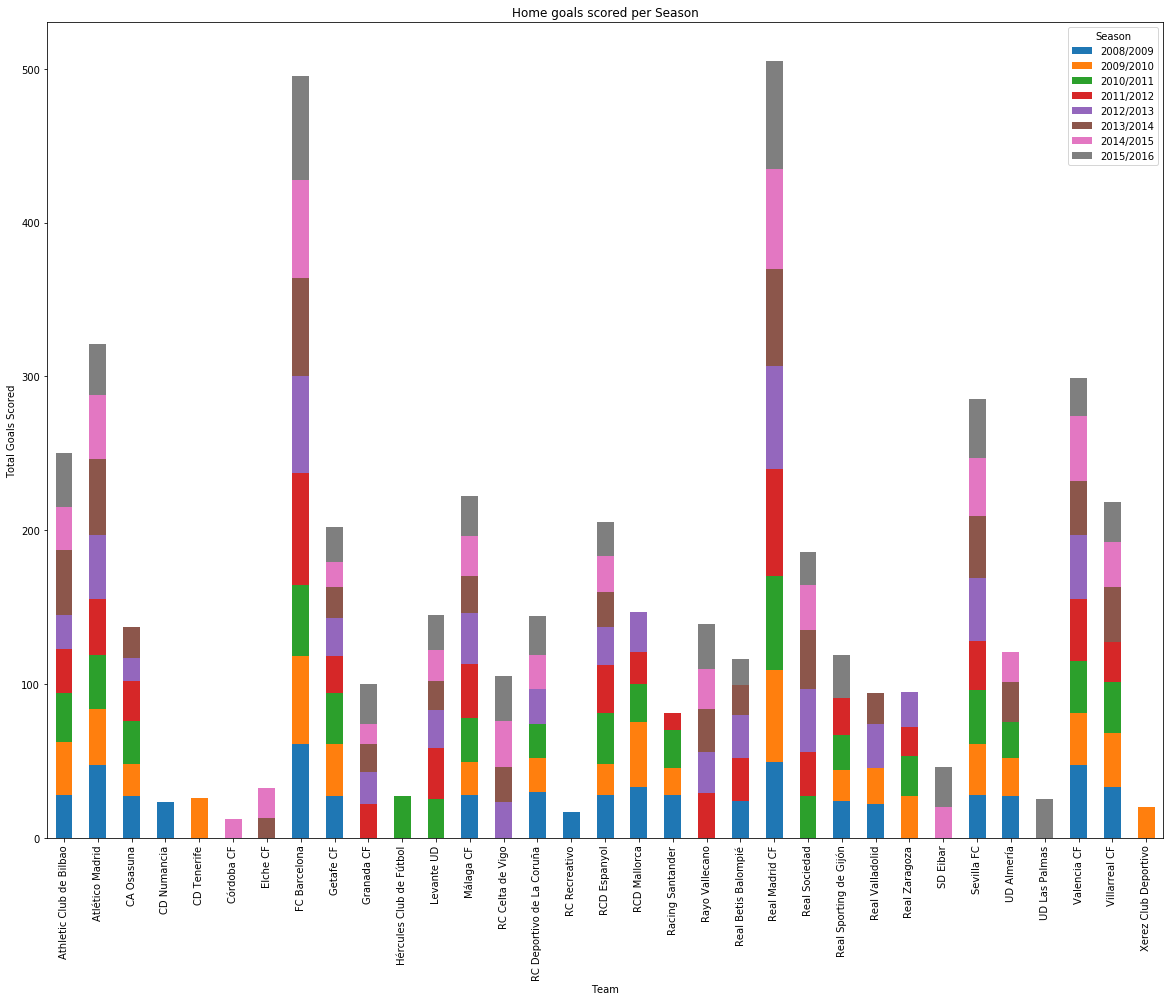

In [9]:
season_team_home_goal_sum = season_team_home_goal_sum.pivot(index='Team_Home', columns='Season', values='Team_Home_Goal')
season_team_home_goal_sum.plot(kind='bar', stacked=True, figsize=(20, 15))
plt.title('Home goals scored per Season')
plt.xlabel('Team')
plt.ylabel('Total Goals Scored')
plt.show()

## Away goals scored per Season

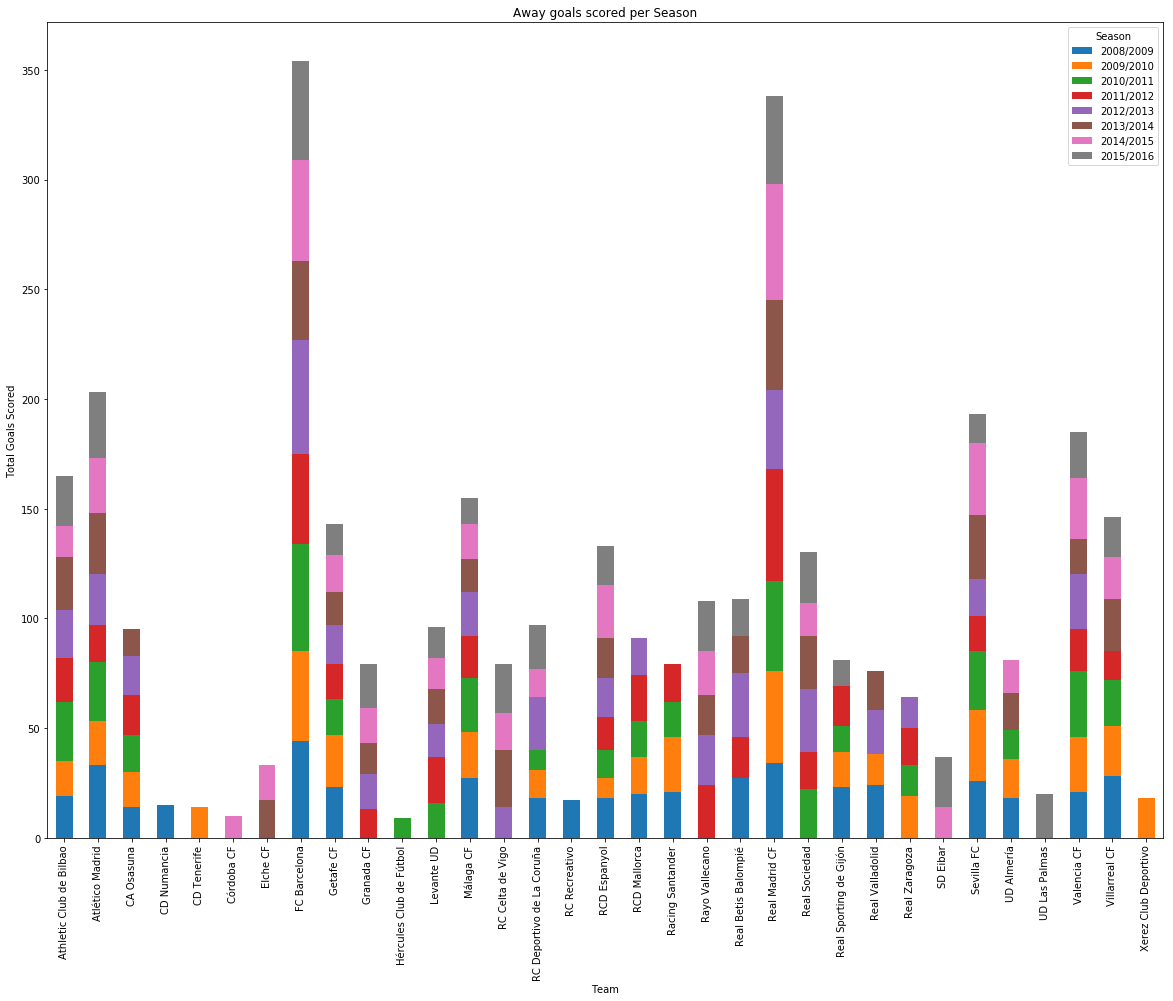

In [10]:
season_team_away_goal_sum = season_team_away_goal_sum.reset_index()

season_team_away_goal_sum = season_team_away_goal_sum.pivot(index='Team_Away', columns='Season', values='Team_Away_Goal')
season_team_away_goal_sum.plot(kind='bar', stacked=True, figsize=(20, 15))
plt.title('Away goals scored per Season')
plt.xlabel('Team')
plt.ylabel('Total Goals Scored')
plt.show()

## Create figure and subplot objects

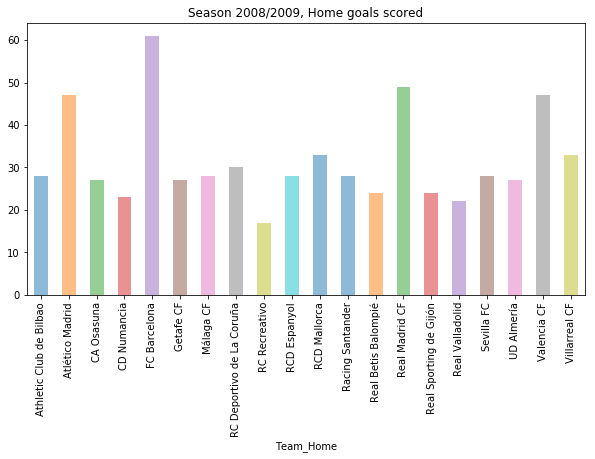

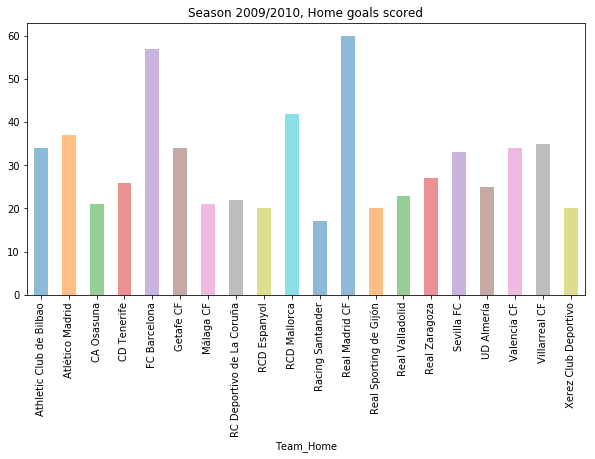

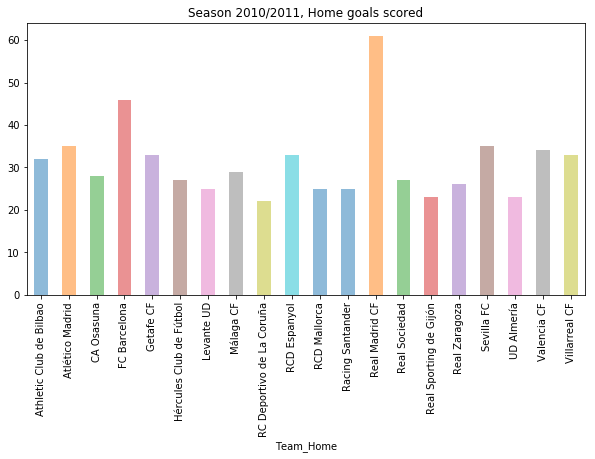

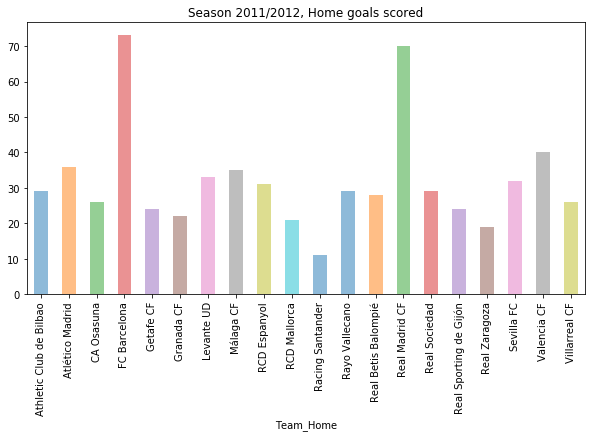

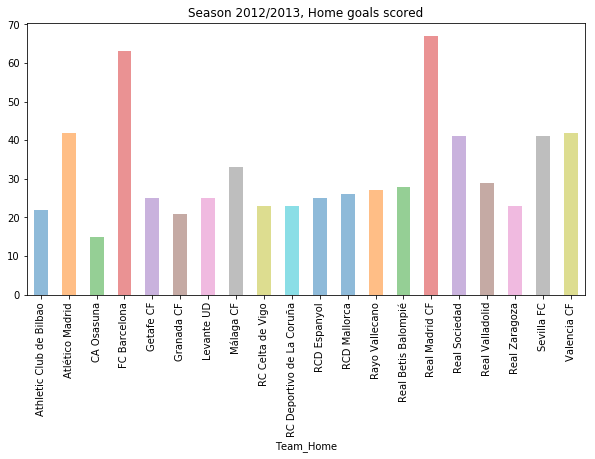

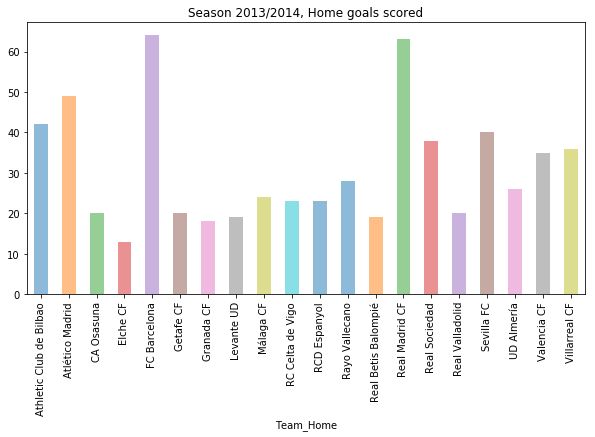

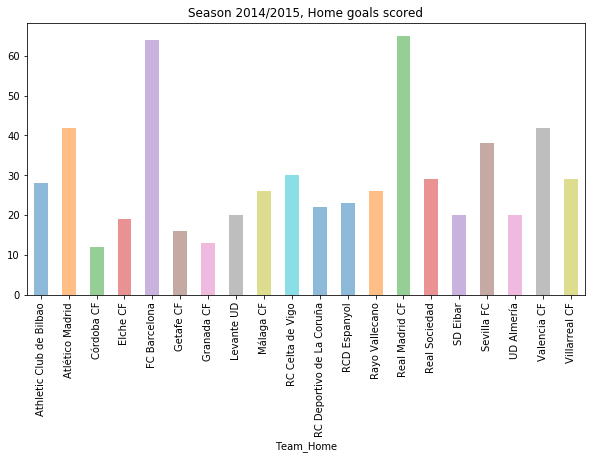

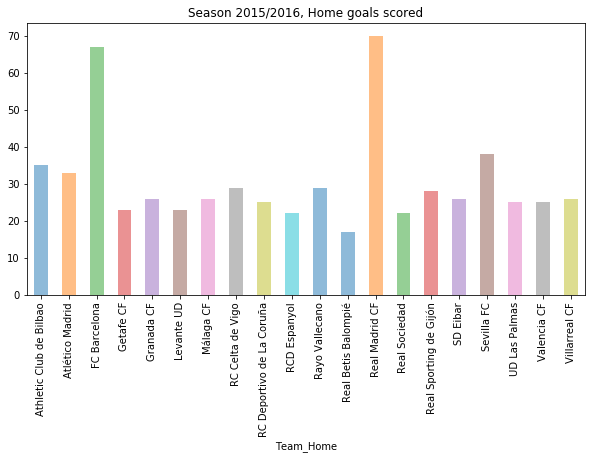

In [230]:
for season_index in unique_seasons.index:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    team_home_goal_sum_series = season_team_home_goal_sum.loc[unique_seasons[season_index]]#.sort_values(ascending=False)
    #print team_home_goal_sum_series
    #print axes[season_index]
    team_home_goal_sum_series.plot(kind='bar', alpha=0.5); 
    axes.set_title('Season ' + unique_seasons[season_index] + ', Home goals scored')
    plt.show()